<a href="https://colab.research.google.com/github/shama12hegde/4NI22CI052_ML_2/blob/main/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=4a277a1404ba653699342ed385a518d82cd301f179ebb8924de9736719cc53b5
  Stored in directory: /root/.cache/pip/wheels/0f/8c/a4/5b7aa56fa6ef11d536d45da775bcc5a2a1c163ff0f8f11990b
Successfully built minisom


Training SOM...
Training complete!


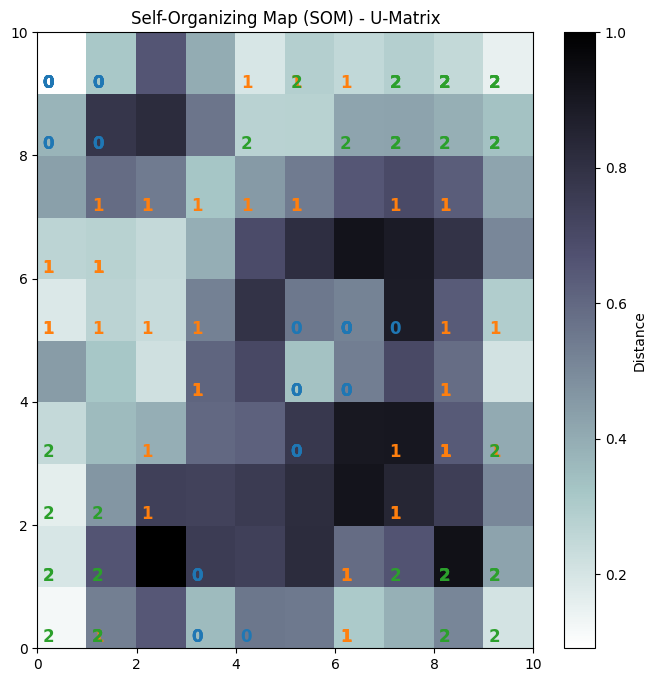

In [5]:
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris


# -----------------------------
# 1. Load and Normalize Dataset
# -----------------------------
data = load_iris()
X = data.data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


# -----------------------------
# 2. Create and Train SOM
# -----------------------------
som_size = (10, 10)  # SOM grid size (10x10 neurons)

som = MiniSom(x=som_size[0], y=som_size[1],
              input_len=X_scaled.shape[1],
              sigma=1.0, learning_rate=0.5)

som.random_weights_init(X_scaled)
print("Training SOM...")
som.train_random(X_scaled, num_iteration=1000)
print("Training complete!")


# -----------------------------
# 3. Visualizing SOM
# -----------------------------
plt.figure(figsize=(8, 8))

# U-Matrix (distance map)
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar(label='Distance')

# Plot each data point on SOM grid
for i, x in enumerate(X_scaled):
    w = som.winner(x)
    plt.text(w[0] + 0.1, w[1] + 0.1,
             str(data.target[i]),
             color=plt.cm.tab10(data.target[i]),
             fontdict={'weight': 'bold', 'size': 12})

plt.title("Self-Organizing Map (SOM) - U-Matrix")
plt.show()
